In [13]:
import tensorflow

In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

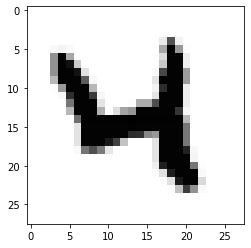

In [22]:
# Visualize one sample
import matplotlib.pyplot as plt
plt.imshow(X_train[20], cmap='Greys')
plt.show()

In [23]:
print(X_train.shape)

(60000, 28, 28)


In [24]:
numClasses = 10
inputFeatureVector = X_train.shape[1] * X_train.shape[2]
print(inputFeatureVector)

784


In [25]:
# MLPs work with 1 dimensional data. So reshape 2D into 1D
X_train = X_train.reshape(X_train.shape[0], inputFeatureVector)
X_test = X_test.reshape(X_test.shape[0], inputFeatureVector)

# GreyScale conversion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Since we have 10 categories to classify, convert the labels into categories
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
inputShape = (inputFeatureVector,)
print("Input Shape: ", inputShape)

Input Shape:  (784,)


In [26]:
from tensorflow import keras
from tensorflow.keras.models import Sequential # for details, https://www.tensorflow.org/api_docs/python/tf/keras/Sequential 
from tensorflow.keras.layers import Dense # check https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense for parameters

model = Sequential()
model.add(Dense(units=350, input_shape=inputShape, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=numClasses, activation='softmax'))

# for more parameters, https://keras.io/api/models/model_training_apis/
# For optimizers, https://keras.io/api/optimizers/
# For losses, https://keras.io/api/losses/
# For metrices, https://keras.io/api/metrics/
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])


model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)



Train on 48000 samples, validate on 12000 samples
48000/48000 [==============================] - 7s 154us/sample - loss: 0.2283 - categorical_accuracy: 0.9337 - val_loss: 0.1219 - val_categorical_accuracy: 0.9635
10000/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [27]:
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')


Test results - Loss: 0.11945351326689124 - Accuracy: 0.9627000093460083%
